### importing libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataframe
df = pd.read_csv(r'C:\Users\mdali\Desktop\data_science\projects\HR_Analysis\hr-dataset.csv') 

### **Data Exploration**
**Dimensions of the dataframe**

In [3]:
df.shape  # checking shape of our data

(14999, 10)

In [4]:
print('Number of observations : ', df.shape[0])  # number of rows in dataset
print('Number of columns      : ', df.shape[1]) # number of columns in dataset

Number of observations :  14999
Number of columns      :  10


 **Information about the schema**

In [5]:
df.head()  # top 5 observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.tail()  # bottom 5 observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
df.columns  # columns we have in dataset

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
df.info()  # data type and null count of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- we can see that there are columns which are wronly read by pandas
- eg.- 'number_project','time_spend_company','Work_accident', 'left','promotion_last_5years' these columns should read as category

In [9]:
# changing data types of columns
col = ['number_project', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years']
for i in col:
    df[col] = df[col].astype('object')

# re-confirming if data type got changed or not for selected
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  object 
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  object 
 5   Work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [10]:
# taking out our categorical columns
cat_col = df.select_dtypes(include='object').columns
df[cat_col] = df[cat_col].astype('category')  # changing data type to category
cat_col  # viewing our categorical columns

Index(['number_project', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [11]:
# statistical measures for categorical columns
df[cat_col].describe()

,number_project,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999,14999,14999
unique,6,8,2,2,2,10,3
top,4,3,0,0,0,sales,low
freq,4365,6443,12830,11428,14680,4140,7316


In [12]:
# taking out our numerical columns
num_col = df.select_dtypes(include='number').columns
num_col  # viewing our numerical column

Index(['satisfaction_level', 'last_evaluation', 'average_montly_hours'], dtype='object')

In [13]:
# statistical measures for numerical columns
df[num_col].describe()

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337
std,0.248631,0.171169,49.943099
min,0.090000,0.360000,96.000000
25%,0.440000,0.560000,156.000000
50%,0.640000,0.720000,200.000000
75%,0.820000,0.870000,245.000000
max,1.000000,1.000000,310.000000


In [14]:
df.nunique()  # no of unique values in each columns

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
department                10
salary                     3
dtype: int64

### **Missing Values**

In [15]:
df.isna().sum()  # checking for null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

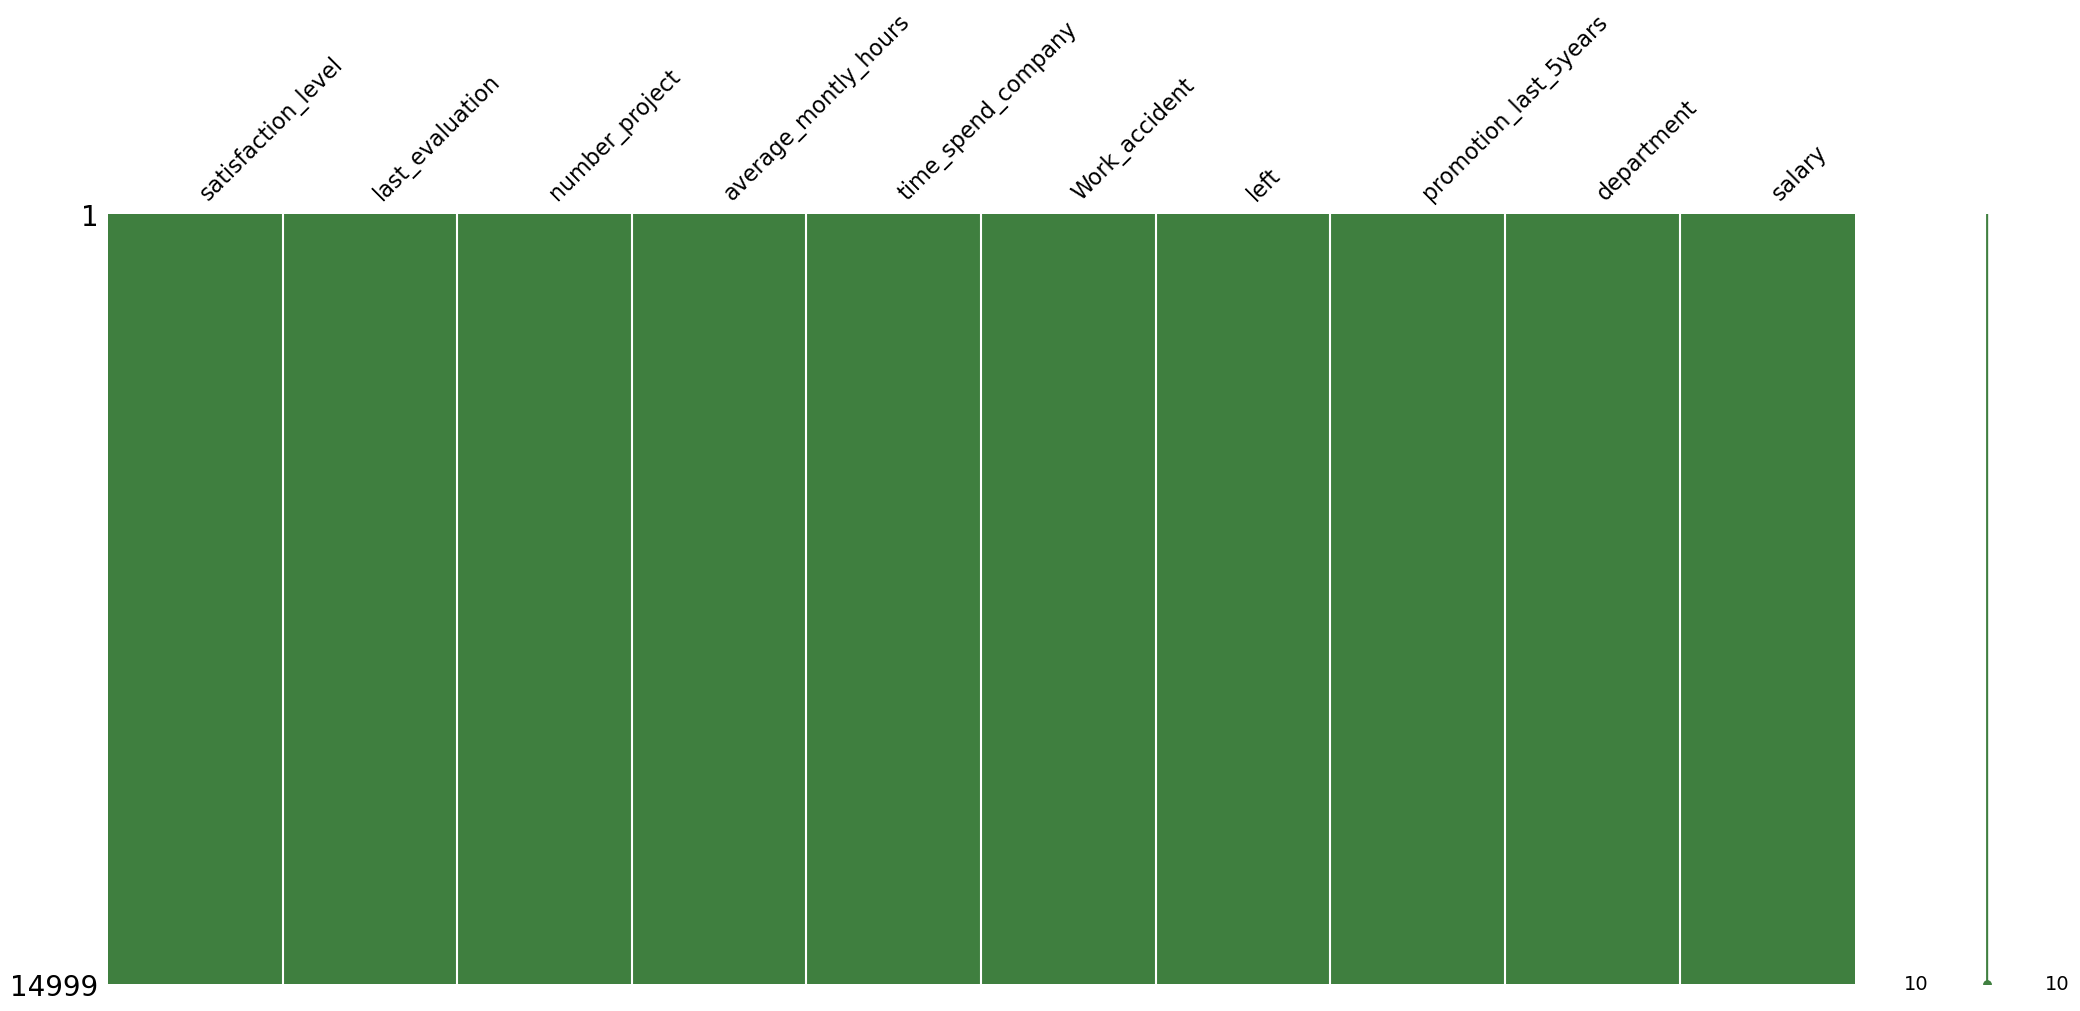

In [16]:
msno.matrix(df, color=(0.25, 0.50, 0.25))  # visualazing missing data
plt.show()  # displaying plot

- as we can see that there are no null values present in tha dataset

### **Qualitative Analysis** 

In [17]:
# function for categorical columns visualisation
def cat_vis(df, var):
    plt.figure(figsize=(18, 8))  # plot size
    sns.set_style('darkgrid')  # setting plot background
    plt.suptitle(f'Distribution of {var} variable',
                 fontsize=18)  # giving title

    plt.subplot(1, 2, 1)  # creating subplots
    ax = sns.countplot(x=df[var], palette='Set2')  # creating countplot
    ax.bar_label(ax.containers[0])  # assignig bar values
    plt.xticks(rotation=30, horizontalalignment="center")

    plt.subplot(1, 2, 2)  # creating suplots
    df[var].value_counts().plot(kind='pie', autopct='%.2f',
                                shadow=True)  # creating pie plot

    plt.show()  # displaying plot

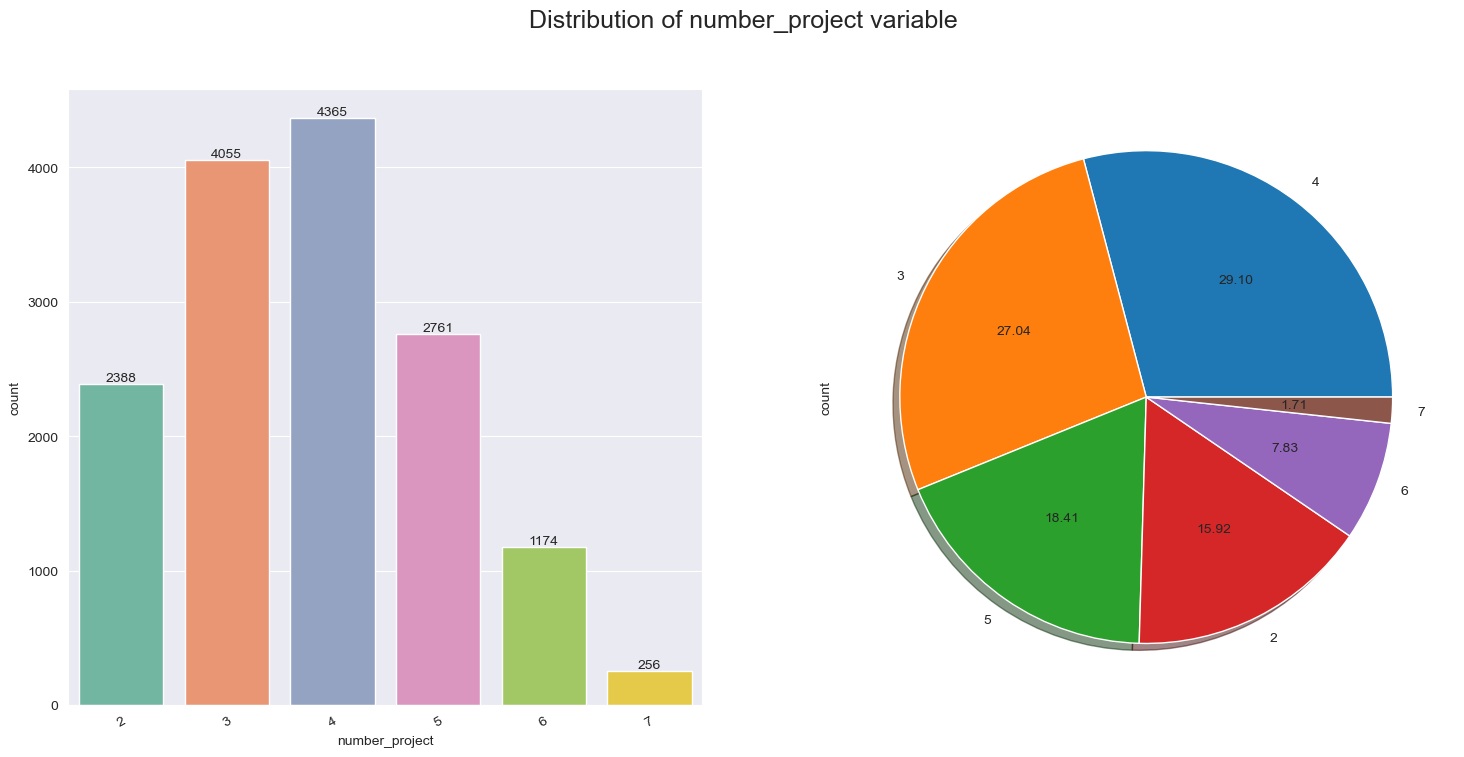

In [18]:
cat_vis(df, 'number_project')

- here we can see the counts of number of projects and their ratio in the dataset
- people with 4 & 3 projects are more likely to got hired 

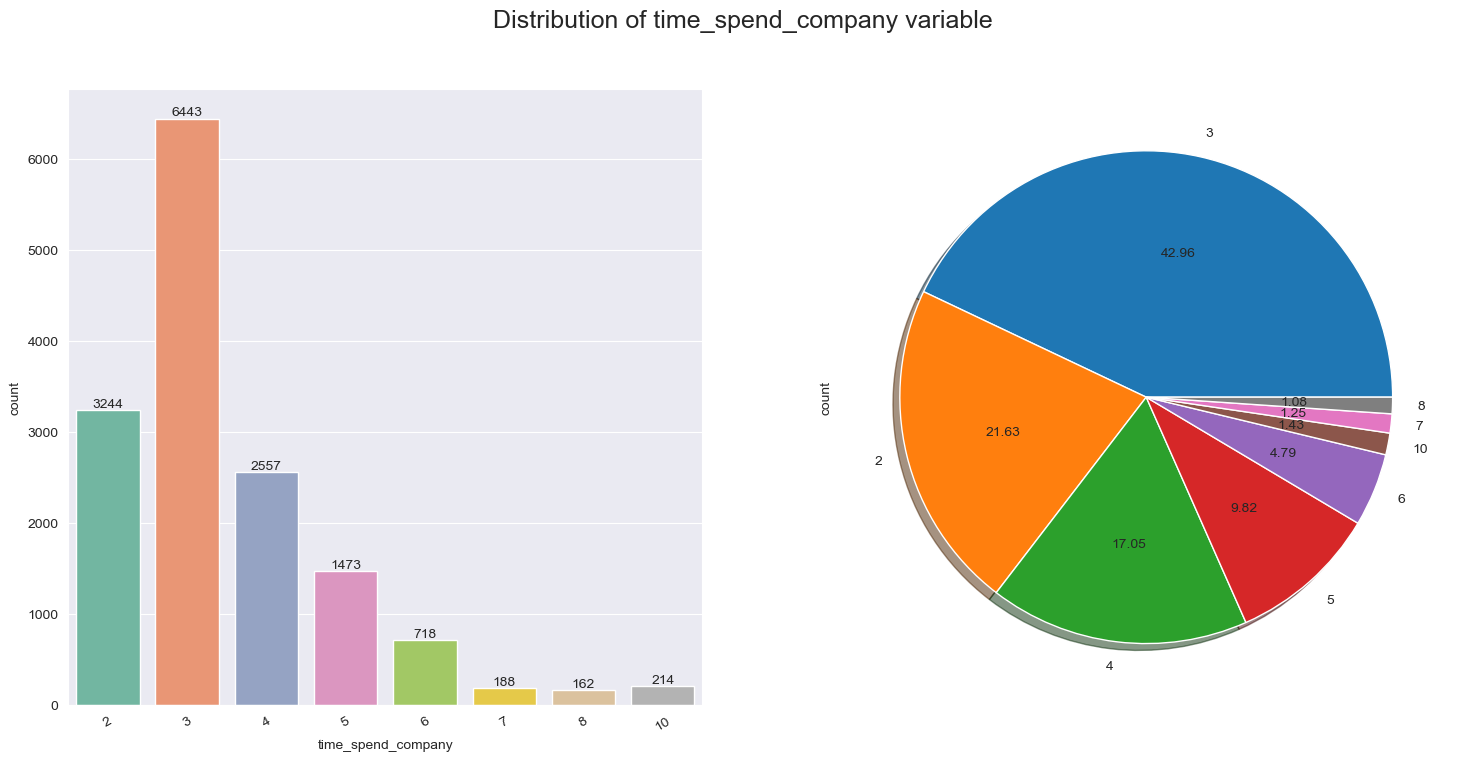

In [19]:
cat_vis(df, 'time_spend_company')

- here we seen that people are likely to be in 3 years for a company 

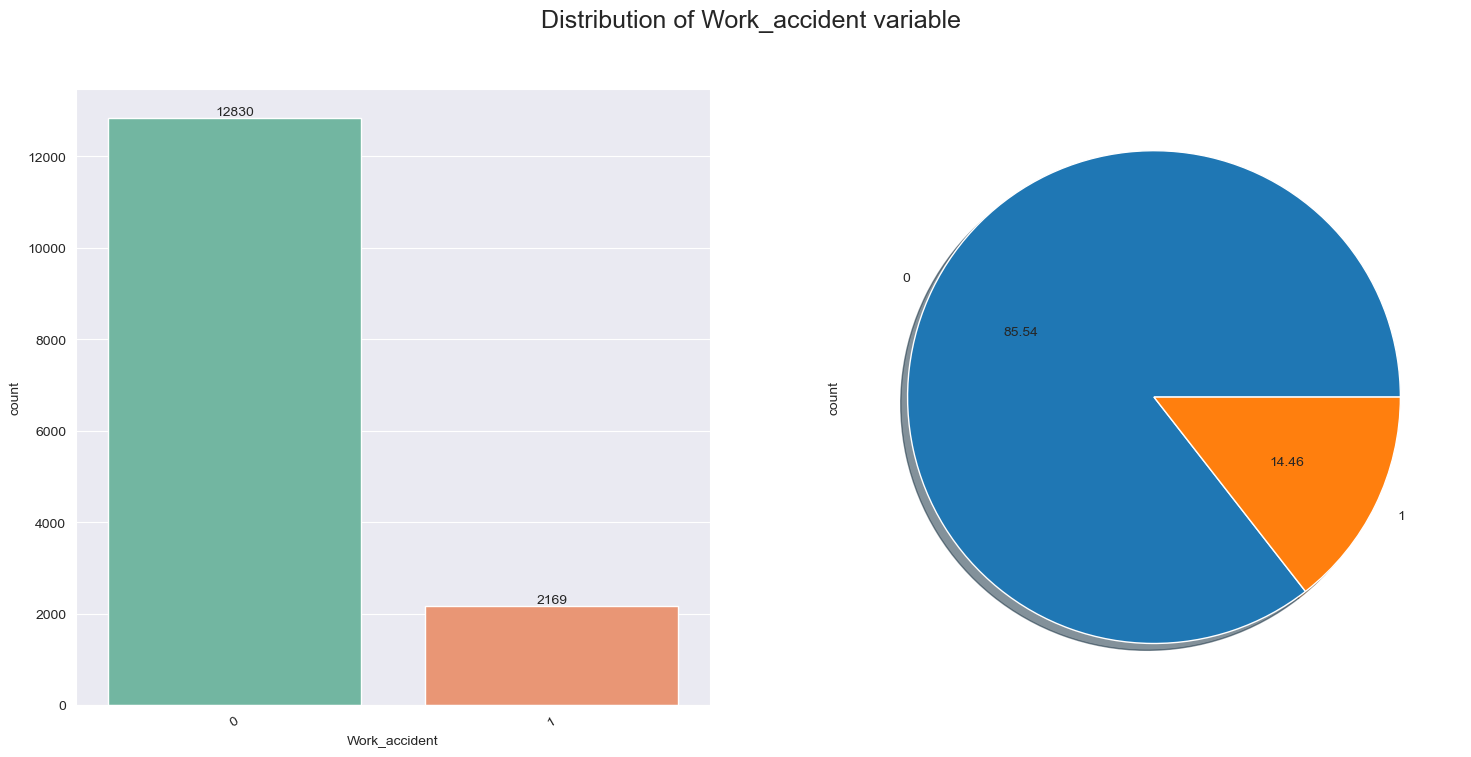

In [20]:
cat_vis(df, 'Work_accident')

- people met with an accident while being in a company more likely we have to minimise it to minimal or no accidents at all

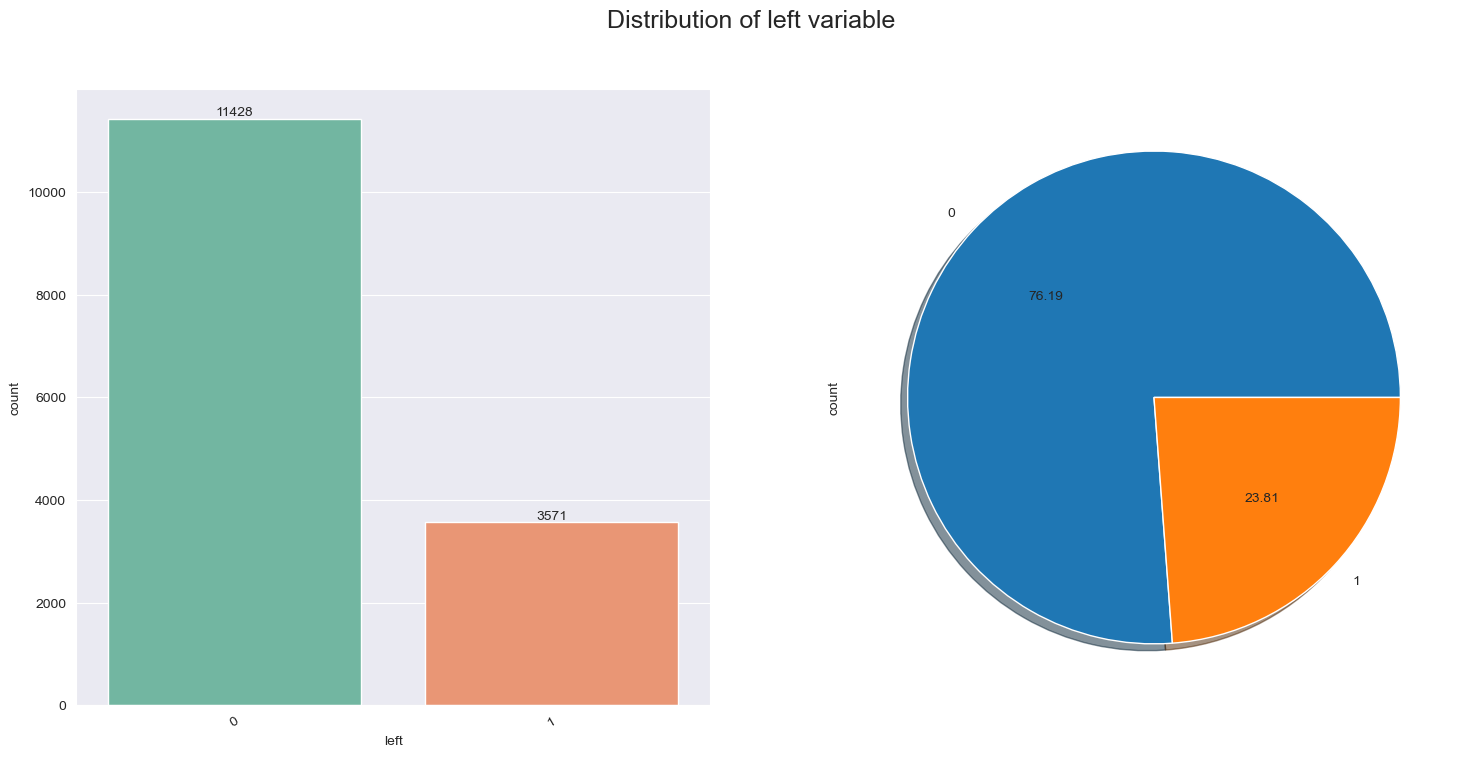

In [21]:
cat_vis(df, 'left')

- counts for people who are in the company or left it

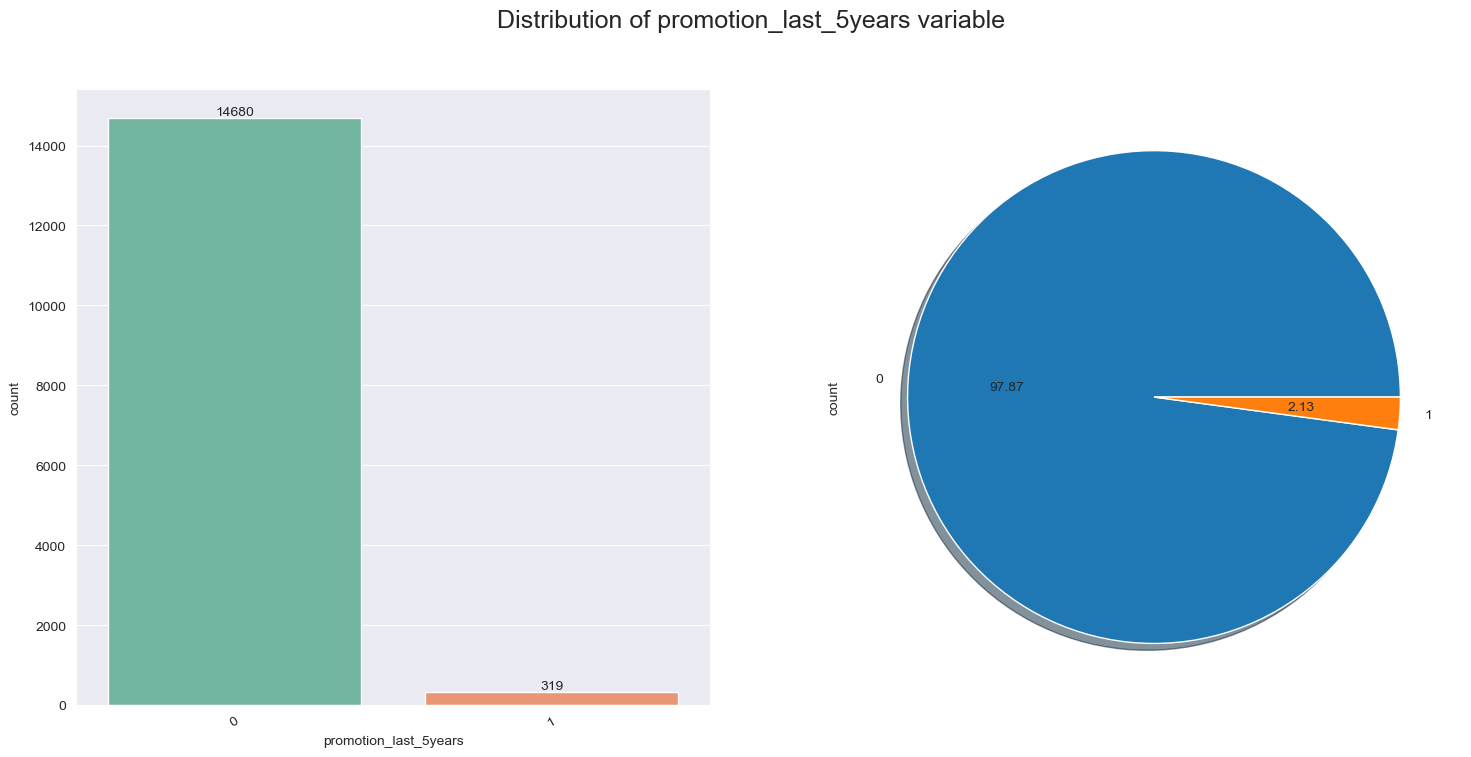

In [22]:
cat_vis(df, 'promotion_last_5years')

- there are very few people who got promotion in last 5 years

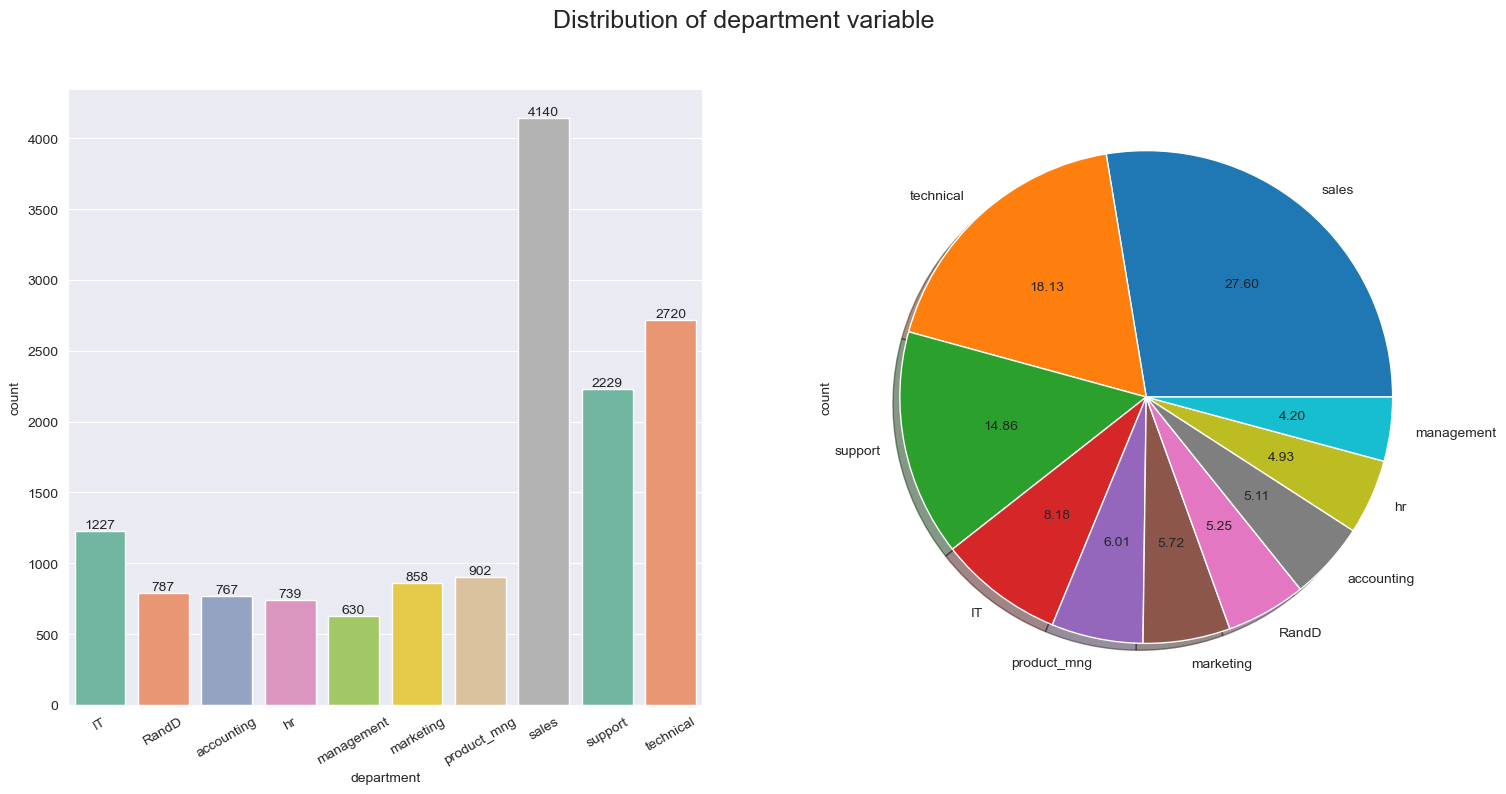

In [23]:
cat_vis(df, 'department')

- this is department wise counts 
- shows the workforce of the company 
- almost half of our employees are from sales

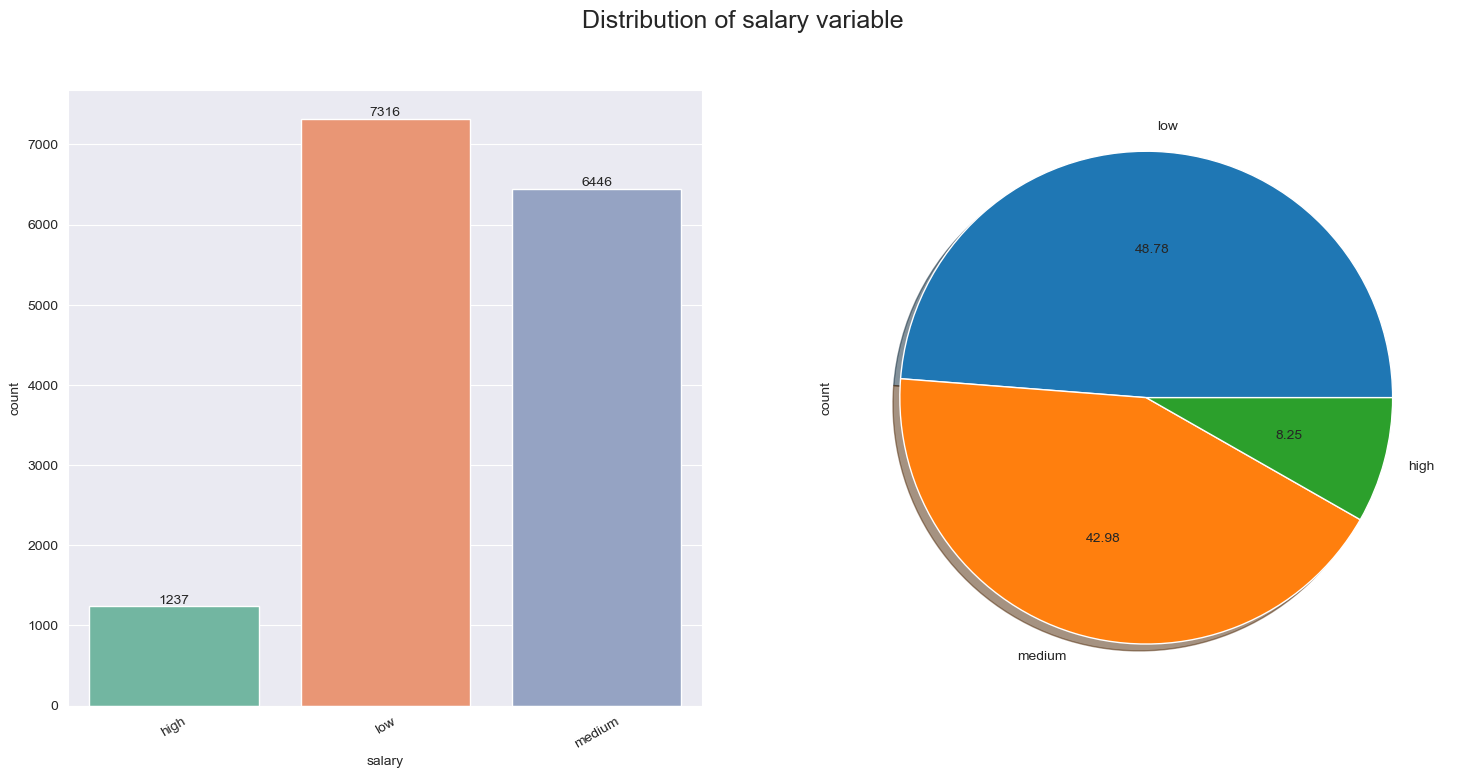

In [24]:
cat_vis(df, 'salary')

- salary distribution ini company 
- there is low salaried employees more followed by medium salaried employees

### **Quantitative Analysis**   

In [25]:
def num_vis(df, var):  # function for numerical columns visualisation
    plt.figure(figsize=(18, 8))  # plot size
    sns.set_style('darkgrid')  # setting background
    plt.suptitle(f'Distribution of {var} variable',
                 fontsize=18)  # setting title

    plt.subplot(1, 2, 1)  # setting subplot
    sns.histplot(df, x=var, kde=True)  # creating histogram plot
    plt.axvline(x=df[var].mean(), color='red', alpha=0.5,
                label='Mean')  # creating mean line
    plt.axvline(x=df[var].median(), color='blue', ls='--',
                alpha=0.5, label='Median')  # creating median line
    plt.legend()  # displaying legend

    plt.subplot(1, 2, 2)  # setting subplot
    sns.boxplot(x=df[var])  # creating boxplot
    plt.show()  # displaying the plots


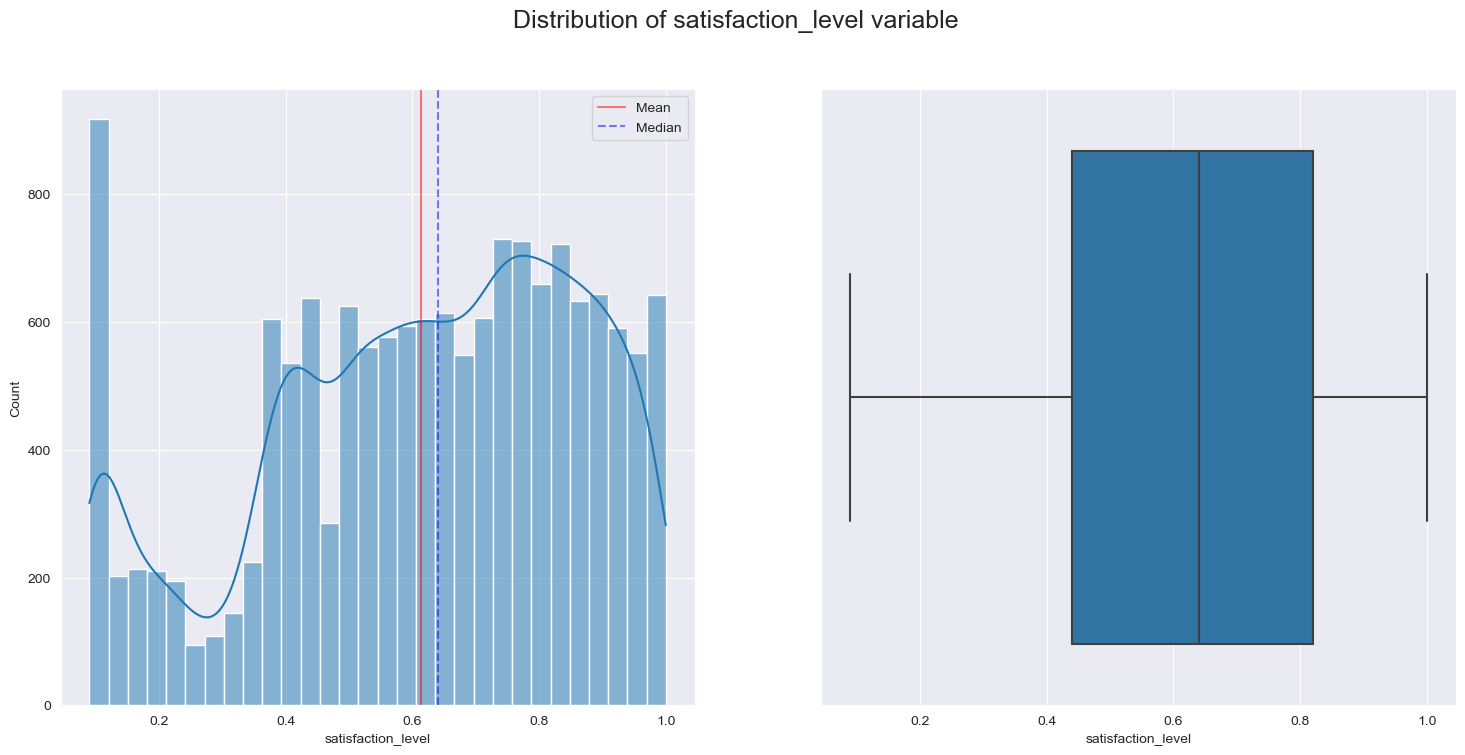

In [26]:
num_vis(df, 'satisfaction_level')


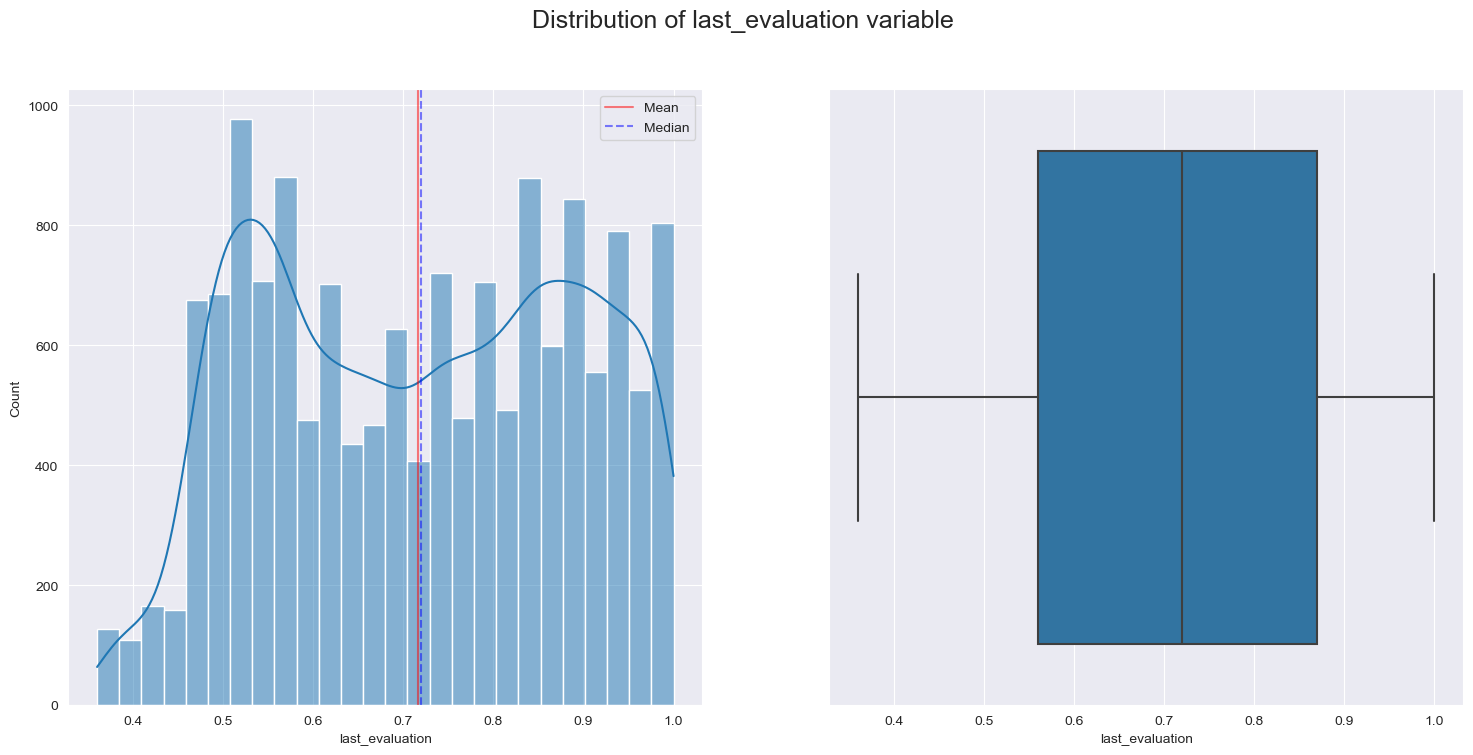

In [27]:
num_vis(df, 'last_evaluation')


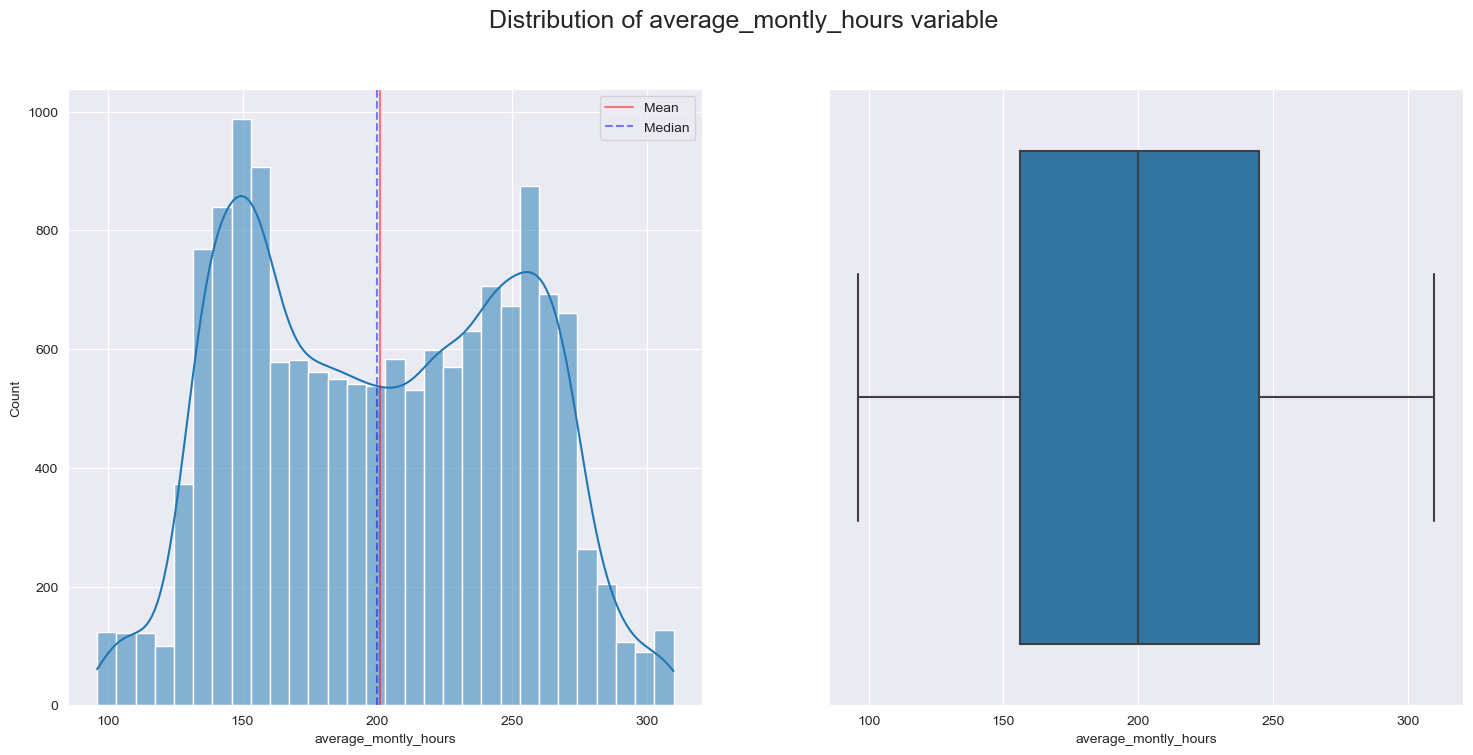

In [28]:
num_vis(df, 'average_montly_hours')


### **Filter data through searchable keys**

In [29]:
high_sal = df[df['salary'] == 'high']  # data frame with high salary candidates
med_sal = df[df['salary'] == 'medium'] # data frame with medium salary candidates
low_sal = df[df['salary'] == 'low']  # data frame with low salary candidates


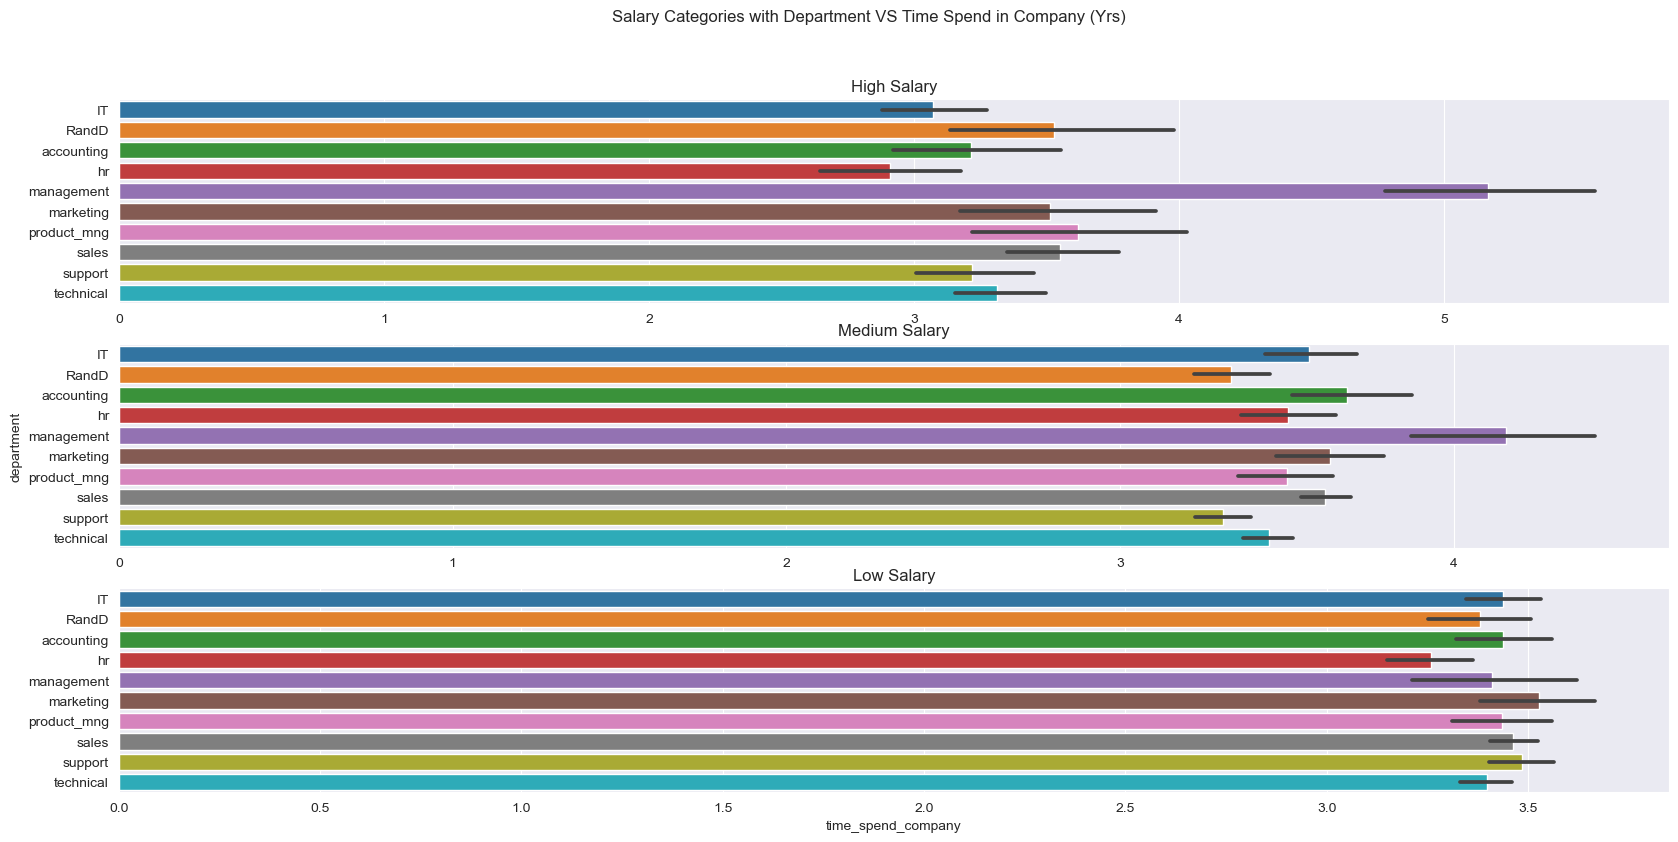

In [30]:
plt.figure(figsize=(20, 9))  # plot size
plt.suptitle('Salary Categories with Department VS Time Spend in Company (Yrs)')

plt.subplot(3, 1, 1)  # setting subplot
plt.title('High Salary') # setting title
ax = sns.barplot(x=high_sal['time_spend_company'].astype(  # setting plot and its parameter
    'int'), y='department', data=high_sal)  # creating bar plot
ax.set_xlabel("")
ax.set_ylabel("")

plt.subplot(3, 1, 2)  # setting subplot
plt.title('Medium Salary') # setting title
ax = sns.barplot(x=med_sal['time_spend_company'].astype( # setting plot and its parameter
    'int'), y='department', data=med_sal)  # creating bar plot
ax.set_xlabel("") 

plt.subplot(3, 1, 3)  # setting subplot
plt.title('Low Salary') # setting title
ax = sns.barplot(x=low_sal['time_spend_company'].astype( # setting plot and its parameter
    'int'), y='department', data=low_sal)  # creating bar plot
ax.set_ylabel("")
plt.show()  # displaying the plots


- marketing teams seems to be in comapny more compared to others 
- also high salery peoples are staying more in company for longer period of time than medium & highy salary employees

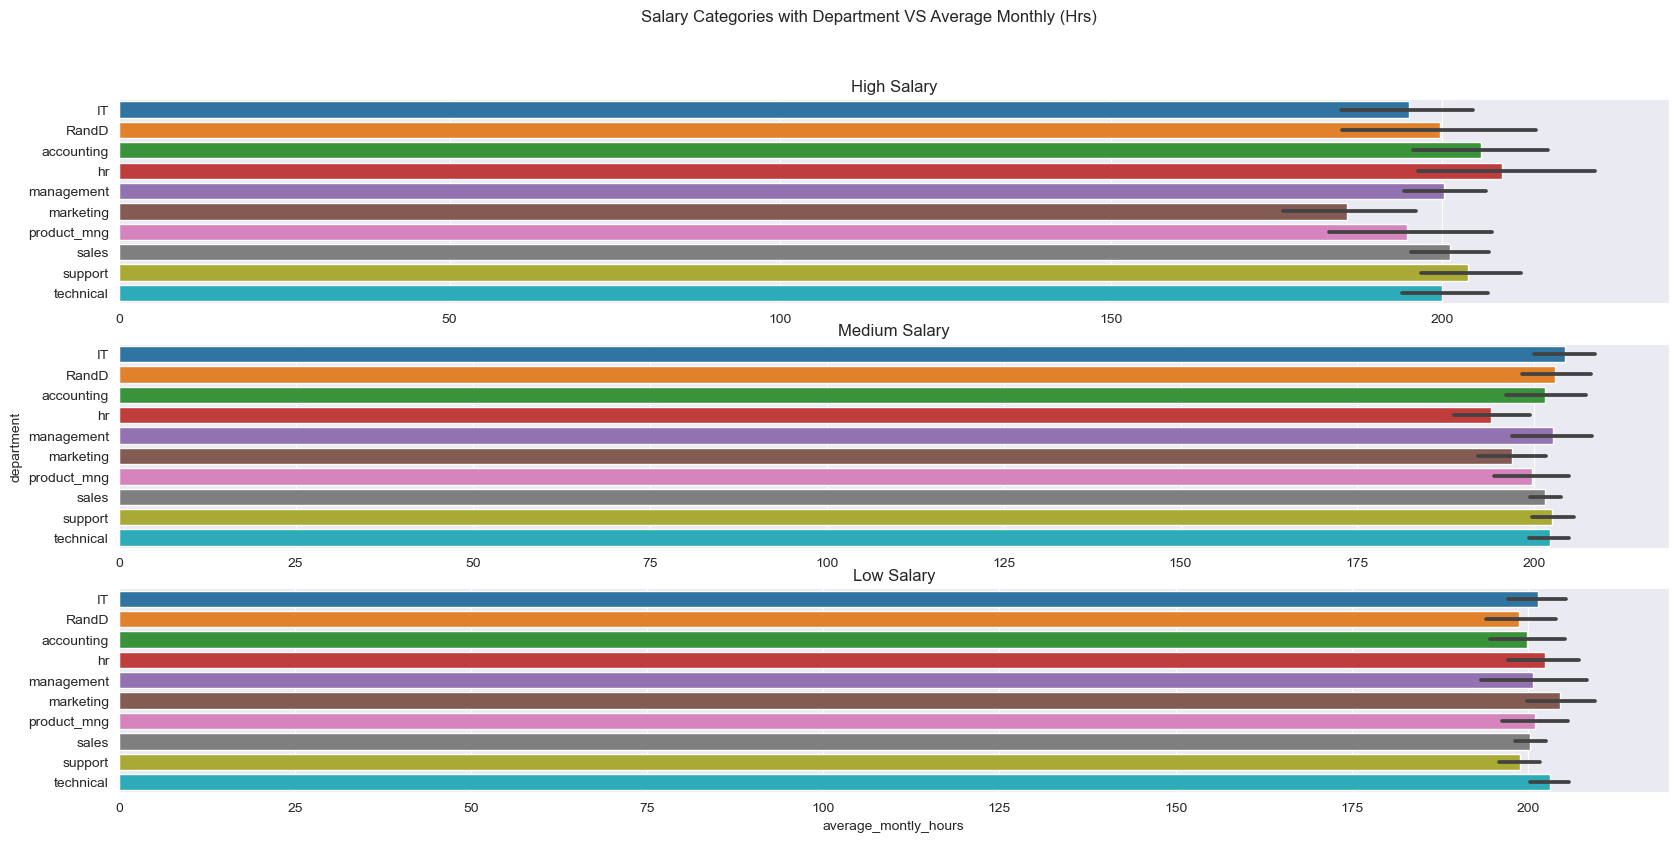

In [31]:
plt.figure(figsize=(20, 9))  # plot size
plt.suptitle('Salary Categories with Department VS Average Monthly (Hrs)')

plt.subplot(3, 1, 1)  # setting subplot
plt.title('High Salary')
ax = sns.barplot(x='average_montly_hours', y='department',
                 data=high_sal)  # creating bar plot
ax.set_xlabel("")
ax.set_ylabel("")

plt.subplot(3, 1, 2)  # setting subplot
plt.title('Medium Salary')
ax = sns.barplot(x='average_montly_hours', y='department',
                 data=med_sal)  # creating bar plot
ax.set_xlabel("")

plt.subplot(3, 1, 3)  # setting subplot
plt.title('Low Salary')
ax = sns.barplot(x='average_montly_hours', y='department',
                 data=low_sal)  # creating bar plot
ax.set_ylabel("")
plt.show()  # displaying the plots


- hr and accounting team with high salaries are spending more time in companies compared to others
- low salaried employees from any team are spending more hours in company

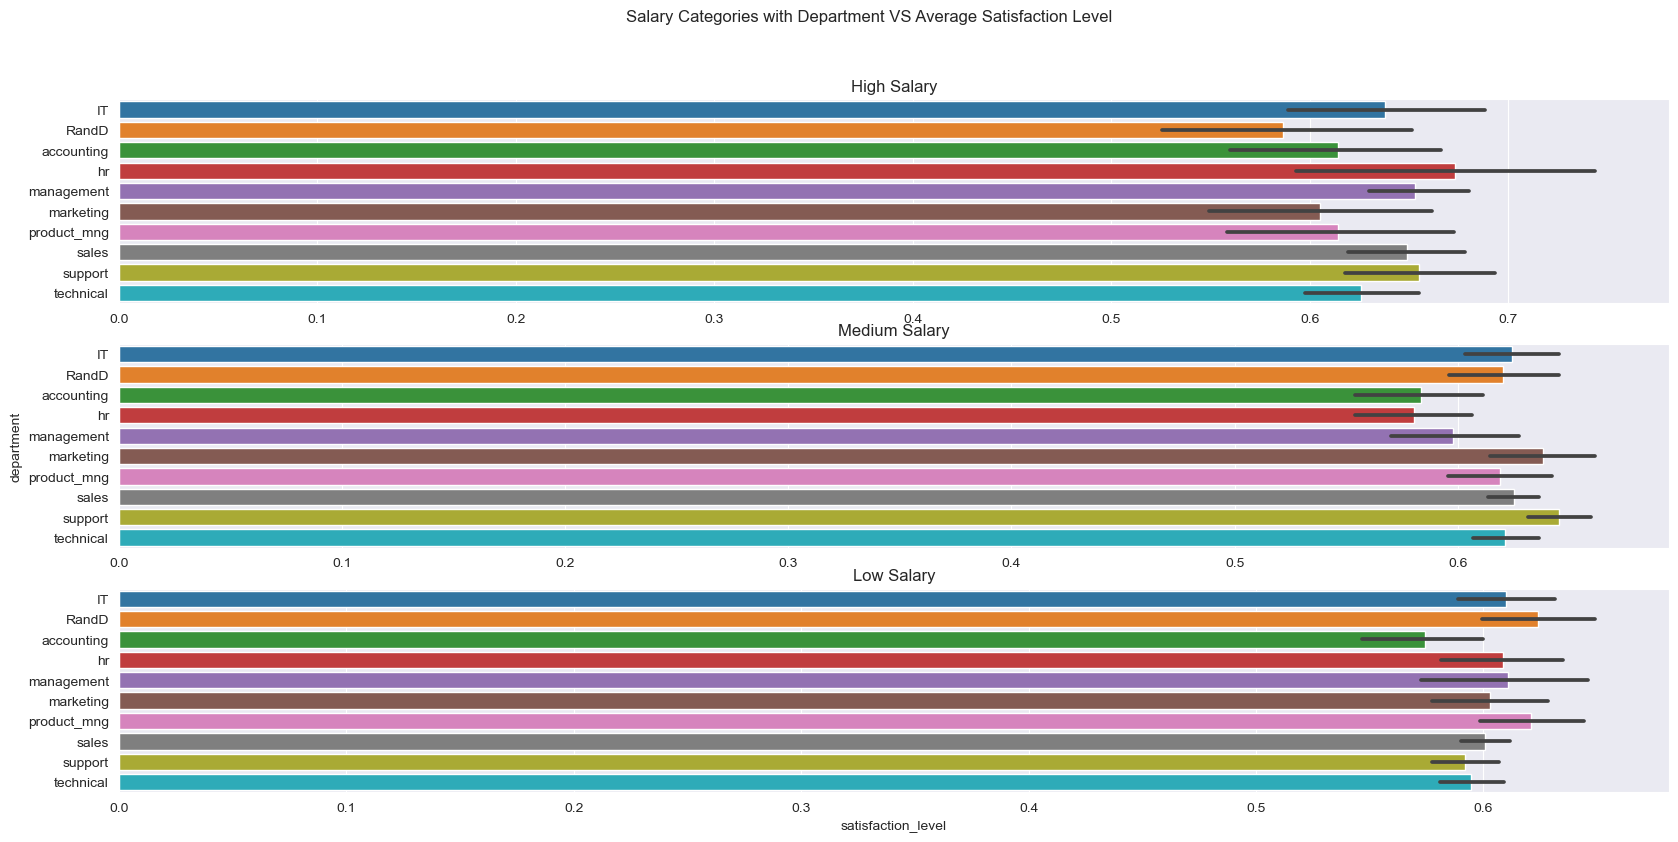

In [32]:
plt.figure(figsize=(20, 9))  # plot size
plt.suptitle('Salary Categories with Department VS Average Satisfaction Level')

plt.subplot(3, 1, 1)  # setting subplot
plt.title('High Salary')
ax = sns.barplot(x='satisfaction_level', y='department',
                 data=high_sal)  # creating bar plot
ax.set_xlabel("")
ax.set_ylabel("")

plt.subplot(3, 1, 2)  # setting subplot
plt.title('Medium Salary')
ax = sns.barplot(x='satisfaction_level', y='department',
                 data=med_sal)  # creating bar plot
ax.set_xlabel("")

plt.subplot(3, 1, 3)  # setting subplot
plt.title('Low Salary')
ax = sns.barplot(x='satisfaction_level', y='department',
                 data=low_sal)  # creating bar plot
ax.set_ylabel("")
plt.show()  # displaying the plots


### **Data sorting**

In [33]:
df.sort_values(by='satisfaction_level', ascending=False).head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2111,1.0,0.92,5,161,3,1,0,0,support,low
10125,1.0,0.66,4,173,2,0,0,0,support,medium
5938,1.0,0.59,5,182,3,1,0,0,management,medium
4724,1.0,0.73,3,245,2,1,0,0,product_mng,low
10906,1.0,0.73,5,189,3,1,0,0,product_mng,low
10900,1.0,0.79,5,171,5,0,0,0,IT,medium
4101,1.0,0.93,5,182,3,1,0,0,support,medium
10878,1.0,0.88,6,201,4,0,0,0,technical,low
8789,1.0,0.49,4,140,3,0,0,0,sales,low
13007,1.0,0.55,4,186,4,1,0,0,technical,medium


- data sorted by satisfaction_level in descending order

In [34]:
df.sort_values(by='average_montly_hours', ascending=False).head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
803,0.10,0.77,6,310,4,0,1,0,technical,medium
809,0.11,0.97,7,310,4,0,1,0,support,medium
1717,0.11,0.96,6,310,4,0,1,0,technical,low
14975,0.10,0.79,7,310,4,0,1,0,hr,medium
1936,0.11,0.97,6,310,4,0,1,0,accounting,medium
1939,0.10,0.79,7,310,4,0,1,0,hr,medium
1963,0.09,0.89,7,310,4,0,1,0,support,low
14972,0.11,0.97,6,310,4,0,1,0,accounting,medium
566,0.11,0.79,7,310,4,0,1,0,hr,low
1985,0.11,0.84,7,310,4,0,1,0,sales,medium


- data sorted by average_montly_hours in descending order

### **Grouping Data**

In [35]:
df.groupby('salary')['number_project'].value_counts()

salary  number_project
high    3                  408
        4                  368
        5                  245
        2                  140
        6                   73
        7                    3
low     4                 2087
        3                 1791
        2                 1344
        5                 1317
        6                  633
        7                  144
medium  4                 1910
        3                 1856
        5                 1199
        2                  904
        6                  468
        7                  109
Name: count, dtype: int64

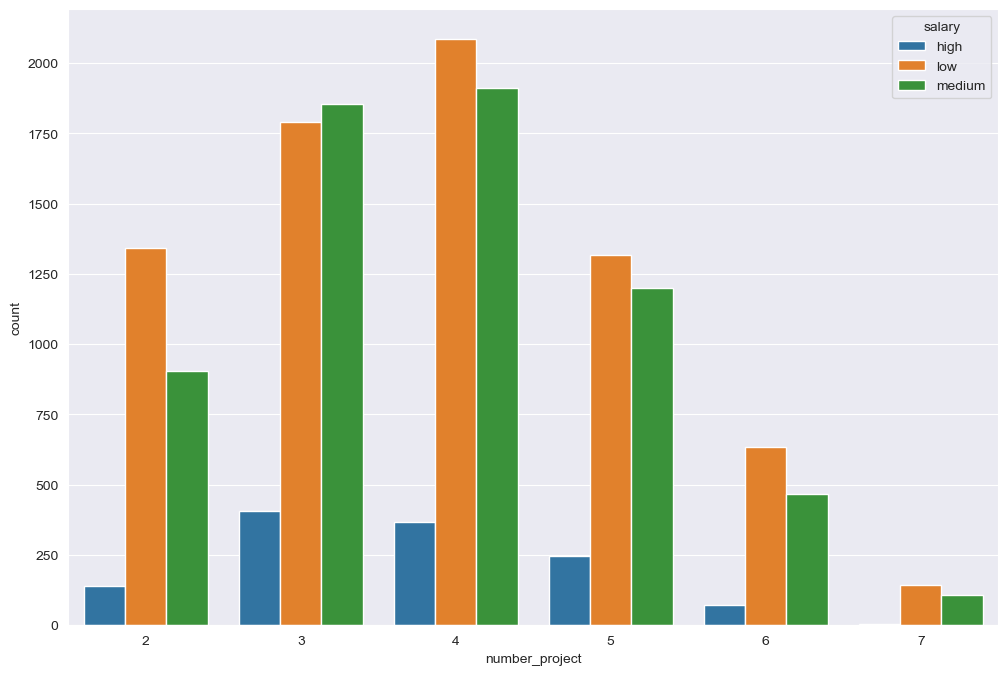

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='number_project', hue='salary')
plt.show()


- data grouped by salary and number of projects
- showing counts of no of projects categorised by salary

In [37]:
df.groupby('number_project').agg(['min', 'max'])

TypeError: Cannot perform min with non-ordered Categorical

- data grouped by number_project 
- showing min, max of satisfaction_level, last_evaluation, average_montly_hours in the grouped categories

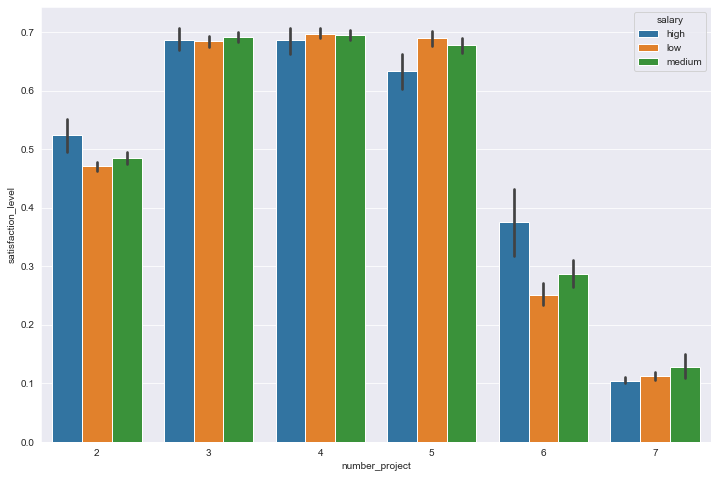

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='number_project', y='satisfaction_level', hue='salary')
plt.show()

- chart grouped by number_project
- showing no of counts for grouped category further categorised by salary

### **Pivot**

In [ ]:
# pivoting the table
table = pd.pivot_table(df, values ='average_montly_hours', index=['salary','time_spend_company'],
                         columns =['department'], aggfunc = np.sum)
table

department                    IT  RandD  accounting     hr  management  \
salary time_spend_company                                                
high   2                    5011   1938        4948   3757        7781   
       3                    7141   4977        6832   3029       14702   
       4                    2348   1883        2000   2342        3454   
       5                    1323    625         183      0        1370   
       6                     356    172         268    280        1459   
       7                       0      0           0      0        4852   
       8                       0    592        1006      0        1542   
       10                      0      0           0      0        9896   
low    2                   24203  16140       10920  14723        7936   
       3                   48853  29700       29778  30640       14712   
       4                   26032  13191       19806  11950        7623   
       5                   16387   8529        7931   8098        3657   
       6                    5111   3420        2199   2412        1296   
       7                     804      0           0      0           0   
       8                     806   1364         522      0           0   
       10                    446      0         408      0         910   
medium 2                   24752  17162       12662  13567        7747   
       3                   43568  30490       23955  26894       16161   
       4                   18733  13967       15049  13361        9407   
       5                   11901   8854        8694   8196        4045   
       6                    4546   5026        3977   6453        1269   
       7                    1860      0           0      0        2046   
       8                    1300      0        1446   1126        3038   
       10                   2638      0        1708      0        1884   

department                 marketing  product_mng   sales  support  technical  
salary time_spend_company                                                      
high   2                        3141         3283   14413     8959       8158  
       3                        6507         5836   20790    11671      20199  
       4                        2487         2046    8097     4113       6585  
       5                         836          296    2997     2300       3365  
       6                        1013          946    3964     1431       1618  
       7                           0          520    2190        0          0  
       8                         518            0       0        0          0  
       10                        344          308    1666      288        284  
low    2                       15598        21152   88929    44577      60702  
       3                       34941        33948  162053    93383     109101  
       4                       14326        16927   80236    44833      62430  
       5                        7852        12200   58767    27761      28511  
       6                        6167         3406   19163    13420      15115  
       7                        1178         2044    3268        0          0  
       8                        1324          698    5140     1794        444  
       10                        818          298    3006     2172       2302  
medium 2                       15641        14974   76010    50330      50118  
       3                       28706        32326  146639    76732      88212  
       4                       14518        14163   59359    32178      47931  
       5                        7570         7885   29556    19499      29260  
       6                        4054         4193   16356     9519      13644  
       7                         650          956   16942        0        430  
       8                        1768          680    4566      538       1184  
       10                       1116         1284    7666     1992       12

### **Correlation coefficients of all input columns with target columns**

<AxesSubplot:>

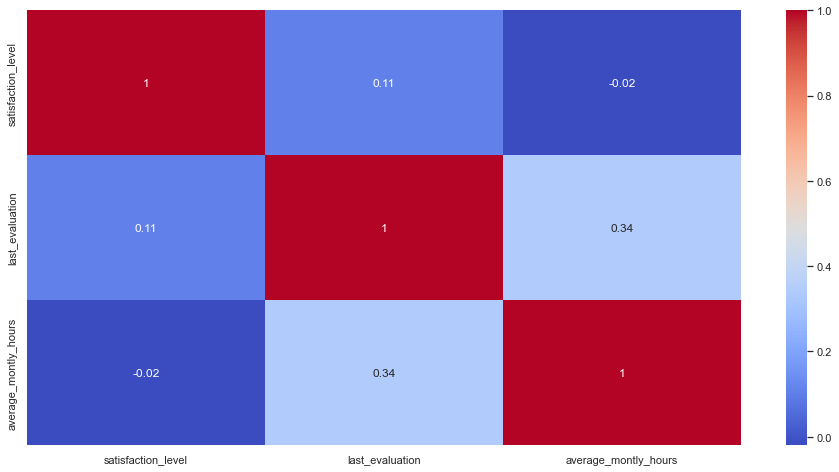

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:>

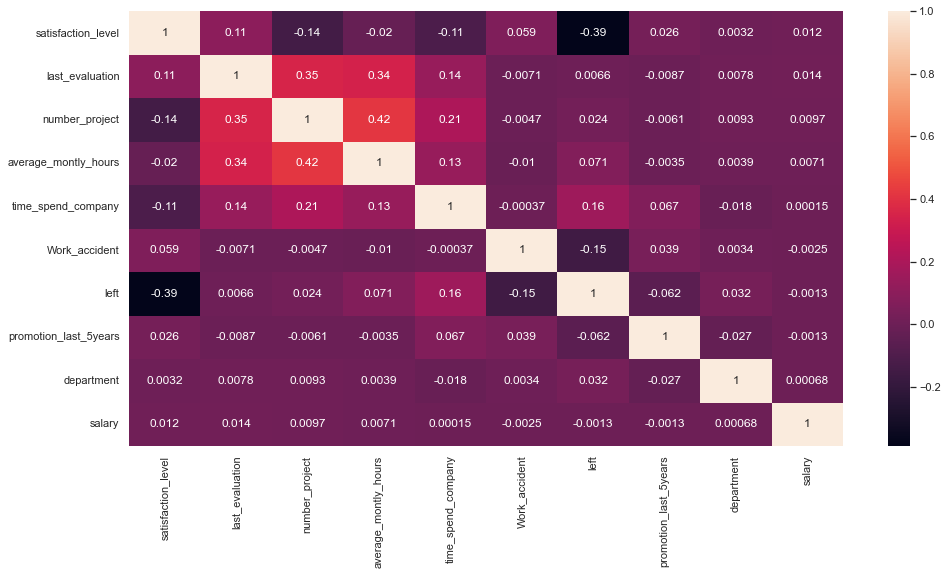

In [ ]:
df1 = df.copy(deep=True)
# coverting cat values to numerical codes for heatmap
for i in cat_col:
    df1[i] =df1[i].astype('category').cat.codes
    
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df1.corr(), annot = True, fmt='.2g')